In [1]:
!conda install -c conda-forge yfinance

^C


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\adity\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\adity\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\adity\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df_aapl = yf.download('AAPL',start='2010-01-01')
df_google = yf.download('GOOG',start='2010-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
df_aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410789,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [4]:
df_google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313


In [5]:
df_aapl = df_aapl.reset_index()
df_google = df_google.reset_index()

In [6]:
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])
df_google['Date'] = pd.to_datetime(df_aapl['Date'])

In [7]:
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3281 entries, 0 to 3280
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3281 non-null   datetime64[ns]
 1   Open       3281 non-null   float64       
 2   High       3281 non-null   float64       
 3   Low        3281 non-null   float64       
 4   Close      3281 non-null   float64       
 5   Adj Close  3281 non-null   float64       
 6   Volume     3281 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 179.6 KB


In [8]:
def RSI(series, period):
    
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = pd.DataFrame.ewm(u, com=period-1, adjust=False).mean() / \
         pd.DataFrame.ewm(d, com=period-1, adjust=False).mean()
    
    return 100 - 100 / (1 + rs)


def rsi_class(x):
    ret = "low"
    if x < 50:
        ret = "low"
    if x > 50:
        ret = "med"
    if x > 70:
        ret = "high"
    return(ret)


In [9]:
def feature_engineering(df):
    
    df['rsi'] = RSI( df['Close'], 14 )
    df['rsicat'] = list(map(rsi_class, df['rsi']))
    
    return df

In [10]:
df_aapl = feature_engineering(df_aapl)
df_stock = df_aapl.copy().set_index('Date').reset_index()

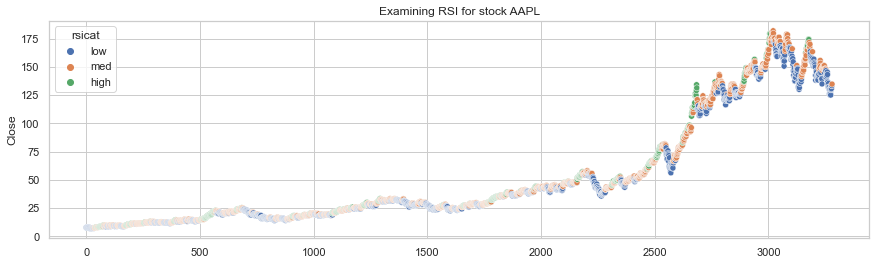

In [11]:
sns.set(rc={'figure.figsize':(14.7,4)})
sns.set_style("whitegrid")
plt.title(f"Examining RSI for stock AAPL")
ax = sns.scatterplot(x = df_stock.index, y = df_stock["Close"], hue = df_stock["rsicat"]);
plt.show()

In [12]:
df_google = feature_engineering(df_google)
df_stock_google = df_google.copy().set_index('Date').reset_index()

In [13]:
df_stock_google.head()

,Date,Open,High,Low,Close,Adj Close,Volume,rsi,rsicat
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293,NaN,low
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494,NaN,low
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526,NaN,low
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695,NaN,low
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313,NaN,low


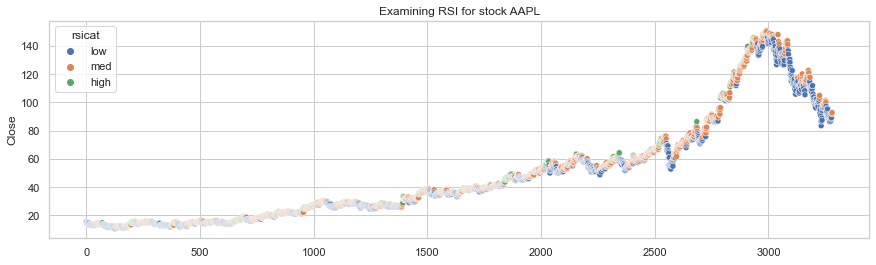

In [14]:
sns.set(rc={'figure.figsize':(14.7,4)})
sns.set_style("whitegrid")
plt.title(f"Examining RSI for stock AAPL")
ax = sns.scatterplot(x = df_stock_google.index, y = df_stock_google["Close"], hue = df_stock_google["rsicat"]);
plt.show()

In [15]:
def sma(df, stock):
    
    """
    
    """
    
    sns.set_style("whitegrid")
    sns.set(rc={'figure.figsize':(14.7,4)})
    
    df_s = df[['Date', 'Close']].reset_index(drop = True)
    df_s['20D-SMA'] = df_s['Close'].rolling(window=20).mean()
    df_s['50D-SMA'] = df_s['Close'].rolling(window=50).mean()
    df_s['100D-SMA'] = df_s['Close'].rolling(window=100).mean()
    df_s.set_index('Date')
    del df_s['Date']
    sns.set_style("whitegrid")
    df_s.plot(title = "SMA analysis for Stock: " + stock)
    
    

In [16]:
def ema(df,stock):
    
    """
    
    """
    sns.set_style("whitegrid")
    sns.set(rc={'figure.figsize':(14.7,4)})
    
    df_s = df[['Date', 'Close']].reset_index(drop = True)
    df_s['20D-EMA'] = df_s['Close'].ewm(span=20,adjust=False).mean()
    df_s['50D-EMA'] = df_s['Close'].ewm(span=50,adjust=False).mean()
    df_s['100D-EMA'] = df_s['Close'].ewm(span=100,adjust=False).mean()
    df_s.set_index('Date')
    del df_s['Date']
    sns.set_style("whitegrid")
    df_s.plot(title = "EMA analysis for Stock: " + stock)
    

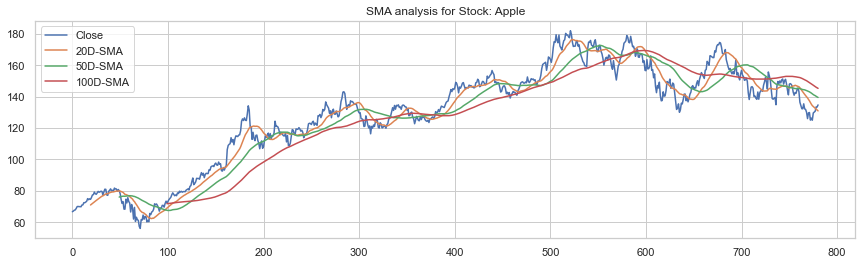

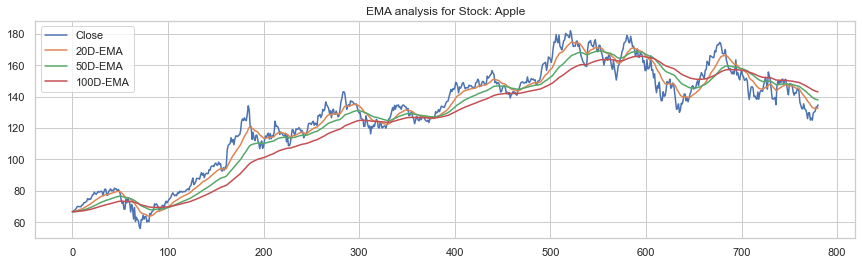

In [17]:
sma(df_stock[2500:],stock='Apple')
ema(df_stock[2500:],stock='Apple')

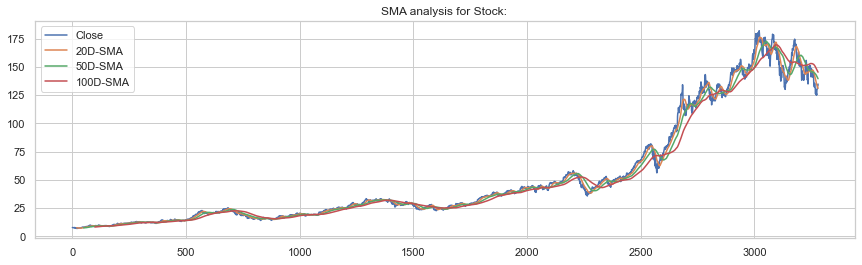

In [18]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(14.7,4)})

df_s = df_stock[['Date', 'Close']].reset_index(drop = True)
df_s['20D-SMA'] = df_s['Close'].rolling(window=20).mean()
df_s['50D-SMA'] = df_s['Close'].rolling(window=50).mean()
df_s['100D-SMA'] = df_s['Close'].rolling(window=100).mean()
df_s.set_index('Date')
del df_s['Date']
sns.set_style("whitegrid")
df_s.plot(title = "SMA analysis for Stock: "  )

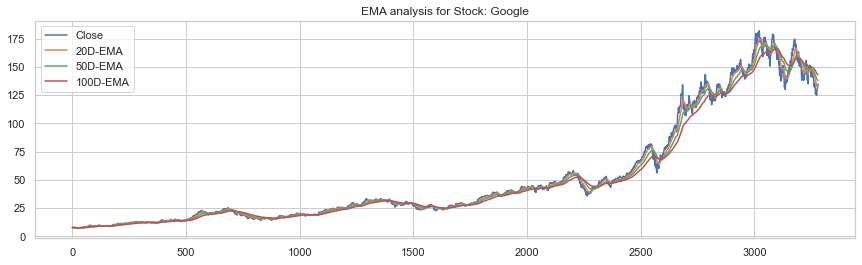

In [19]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(14.7,4)})

df_s = df_stock[['Date', 'Close']].reset_index(drop = True)
df_s['20D-EMA'] = df_s['Close'].ewm(span=20,adjust=False).mean()
df_s['50D-EMA'] = df_s['Close'].ewm(span=50,adjust=False).mean()
df_s['100D-EMA'] = df_s['Close'].ewm(span=100,adjust=False).mean()
df_s.set_index('Date')
del df_s['Date']
sns.set_style("whitegrid")
df_s.plot(title = "EMA analysis for Stock: Google")

In [21]:
df_s

,Close,20D-EMA,50D-EMA,100D-EMA
0,7.643214,7.643214,7.643214,7.643214
1,7.656429,7.644473,7.643732,7.643476
2,7.534643,7.634013,7.639454,7.641321
3,7.520714,7.623222,7.634798,7.638933
4,7.570714,7.618222,7.632285,7.637582
...,...,...,...,...
3276,130.149994,132.557255,138.780638,143.868345
3277,130.729996,132.383230,138.464927,143.608180
3278,133.490005,132.488638,138.269832,143.407820
3279,133.410004,132.576387,138.079250,143.209843
